In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from collections import OrderedDict, defaultdict

## Load Train and Test Data

In [153]:
#temp
train = pd.read_csv("train.csv")
train_copy = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [154]:
#data
train = pd.read_csv("https://raw.githubusercontent.com/mkivenson/Computational-Mathematics/master/Final%20Project/train.csv")
train_copy = pd.read_csv("https://raw.githubusercontent.com/mkivenson/Computational-Mathematics/master/Final%20Project/train.csv")

test = pd.read_csv("https://raw.githubusercontent.com/mkivenson/Computational-Mathematics/master/Final%20Project/test.csv")

In [155]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Preprocessing
### Columns With NaN

In [156]:
train.loc[:, train.isna().any()]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [157]:
def removena(data):
    #LotFrontage: Linear feet of street connected to property. Fill with mean lot frontage in dataset
    data['LotFrontage'] = data['LotFrontage'].fillna(np.mean(data['LotFrontage']))

    #Alley: Type of alley access. Fill NaN with None (assume no alley access)
    data['Alley'] = data['Alley'].fillna('None')

    #MasVnrType: Masonry veneer type. Fill NaN with None (assume no veneer)
    data['MasVnrType'] = data['Alley'].fillna('None')

    #MasVnrArea: Masonry veneer area in square feet. Fill NaN with 0 (assume no veneer)
    data['MasVnrArea'] = data['Alley'].fillna(0)

    #BsmtQual: Height of the basement - assume no basement
    data['BsmtQual'] = data['BsmtQual'].fillna('None')

    #BsmtCond: General condition of the basement - assume no basement
    data['BsmtCond'] = data['BsmtCond'].fillna('None')

    #BsmtExposure: Walkout or garden level basement walls - assume no basement
    data['BsmtExposure'] = data['BsmtExposure'].fillna('None')

    #BsmtFinType1: Quality of basement finished area - assume no basement
    data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

    #BsmtFinType2: Quality of second finished area (if present) - assume no basement
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')
    
    #BsmtFinSF1
    data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(0)
    
    #BsmtFinSF2
    data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(0)
    
    #BsmtUnfSF
    data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(0)
    
    #TotalBsmtSF
    data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
    
    #BsmtFullBath
    data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
    
    #BsmtHalfBath
    data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)

    #Electrical: Electrical system - only one house with NaN for this field, set to SBrkr (most common)
    data['Electrical'] = data['Electrical'].fillna('SBrkr')

    #FireplaceQu: Fireplace quality - assume no fireplace, set none
    data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

    #GarageType: Garage location - set to None, assume no garage 
    data['GarageType'] = data['GarageType'].fillna('None')

    #GarageYrBlt: Year garage was built - set to None, assume no garage 
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna('None')

    #GarageFinish: Interior finish of the garage - set to None, assume no garage 
    data['GarageFinish'] = data['GarageFinish'].fillna('None')

    #GarageQual: Garage quality - set to None, assume no garage 
    data['GarageQual'] = data['GarageQual'].fillna('None')

    #GarageCond: Garage condition - set to None, assume no garage 
    data['GarageCond'] = data['GarageCond'].fillna('None')
    
    #GarageCars
    data['GarageCars'] = data['GarageCars'].fillna(0)
    
    #GarageArea
    data['GarageArea'] = data['GarageArea'].fillna(0)

    #PoolQC: Pool quality - set to None, assume no pool
    data['PoolQC'] = data['PoolQC'].fillna('None')

    #Fence: Fence quality - set to None, assume no fence
    data['Fence'] = data['Fence'].fillna('None')

    #MiscFeature: Miscellaneous feature not covered in other categories, assume no feature
    data['MiscFeature'] = data['MiscFeature'].fillna('None')
    return data  
train = removena(train)
train_copy = removena(train_copy)

### Encoding

In [158]:
train.select_dtypes(include = ['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,1999,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,1978,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,1941,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,1950,Unf,TA,TA,Y,None,None,None,WD,Normal


In [159]:
def encode_train():
    # integer encode
    label_encoder = LabelEncoder()
    for col in train.select_dtypes(include = ['object']):
        
        #label_encoder.fit(list(code))
        #data[col] = label_encoder.transform(data[col].astype(str))
        
        #instead of using label encoder, which codes strings alphabetically or one hot encoder, I made a custom dict
        di = (train[[col, 'SalePrice']]
         .groupby(col)
         .mean()
         .sort_values('SalePrice')
         .reset_index()
         .reset_index()[col]
         .to_dict(into=OrderedDict))
        di = {v: k for k, v in di.items()}
        train[col] = train[col].map(di)
    return train

def encode_test():
    # integer encode
    label_encoder = LabelEncoder()
    for col in test.select_dtypes(include = ['object']):
        di = (train_copy[[col, 'SalePrice']]
         .groupby(col)
         .mean()
         .sort_values('SalePrice')
         .reset_index()
         .reset_index()[col]
         .to_dict(into=OrderedDict))
        di = {v: k for k, v in di.items()}
        test[col] = test[col].map(di)
    return test
    
train = encode_train()

### Visualize 

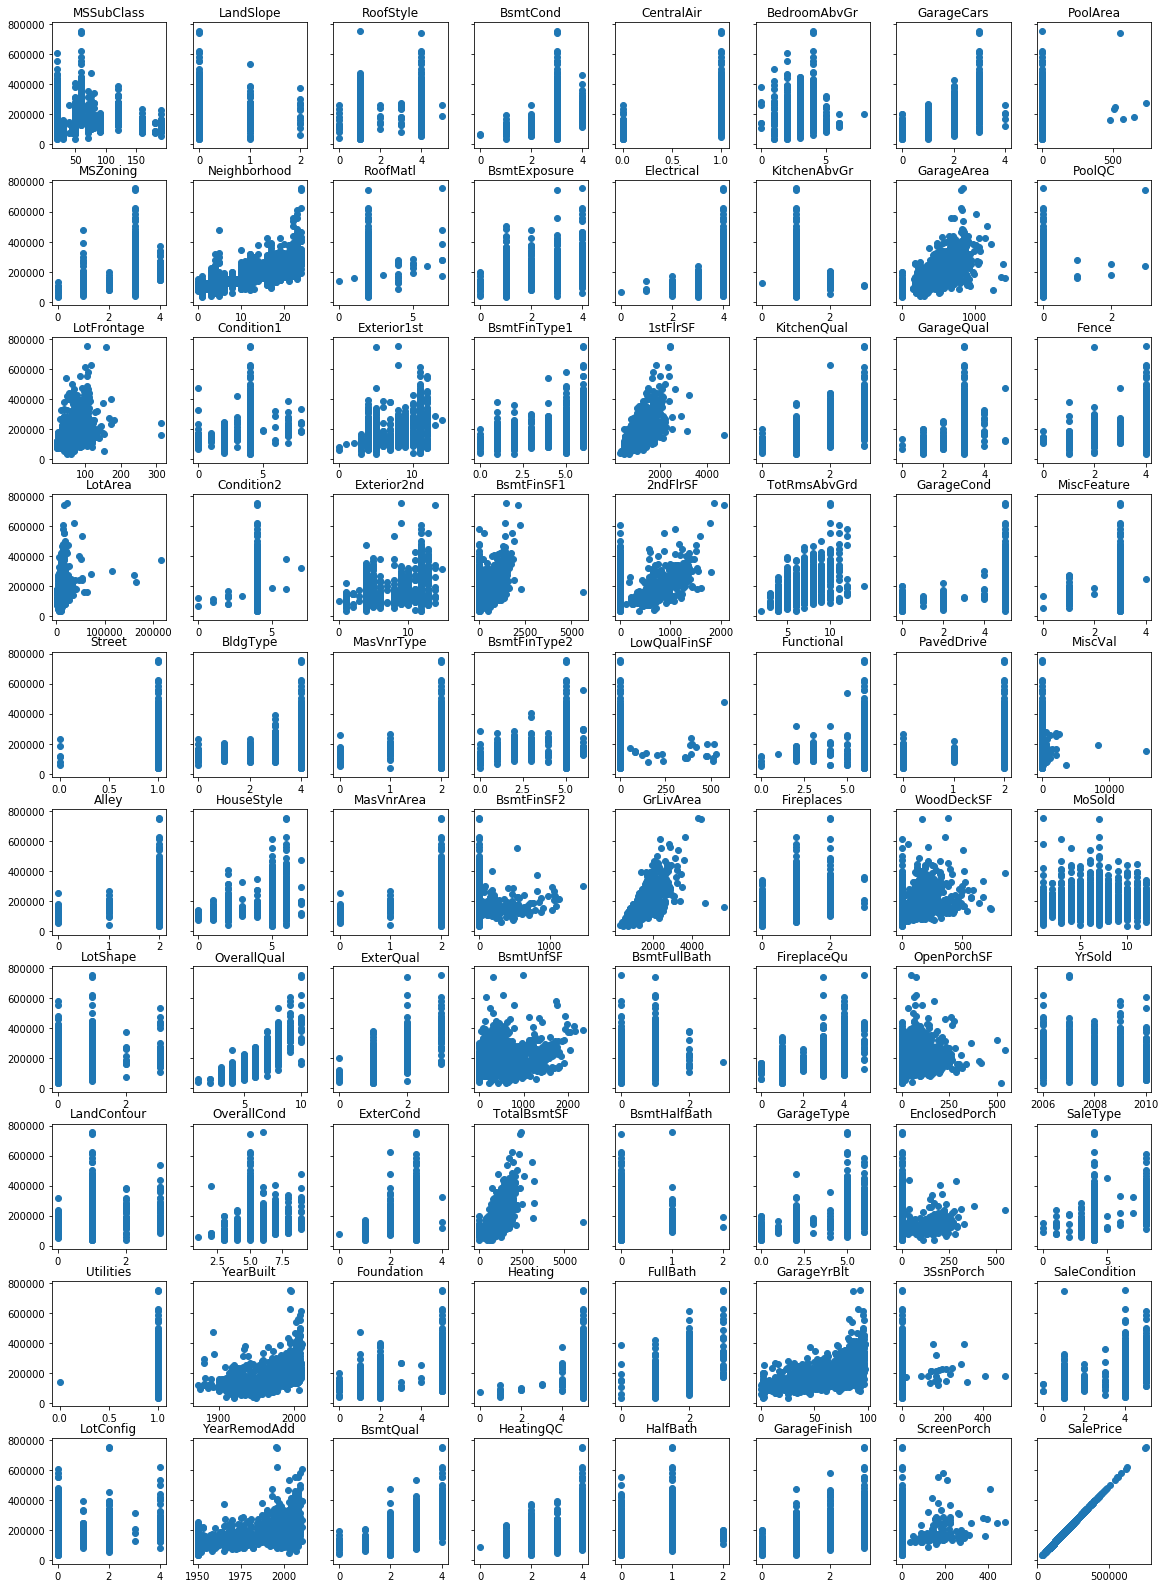

In [160]:
fig, ax = plt.subplots(10, 8, sharey=True,  figsize=(16, 22))
plt.tight_layout()

for y, row in enumerate(ax):
    for x, col in enumerate(row):
    #for column in train.columns:
        column = (train.columns[(train.columns != 'Id')])[x * 10 + y]
        col.scatter(train[column], train['SalePrice'])
        col.set_title(column)

### Transformations

In [161]:
train['1stFlrSF'] = train['1stFlrSF'].apply(lambda x: np.log(x+1))
train.BsmtUnfSF = train.BsmtUnfSF.apply(lambda x: np.log(x+1))

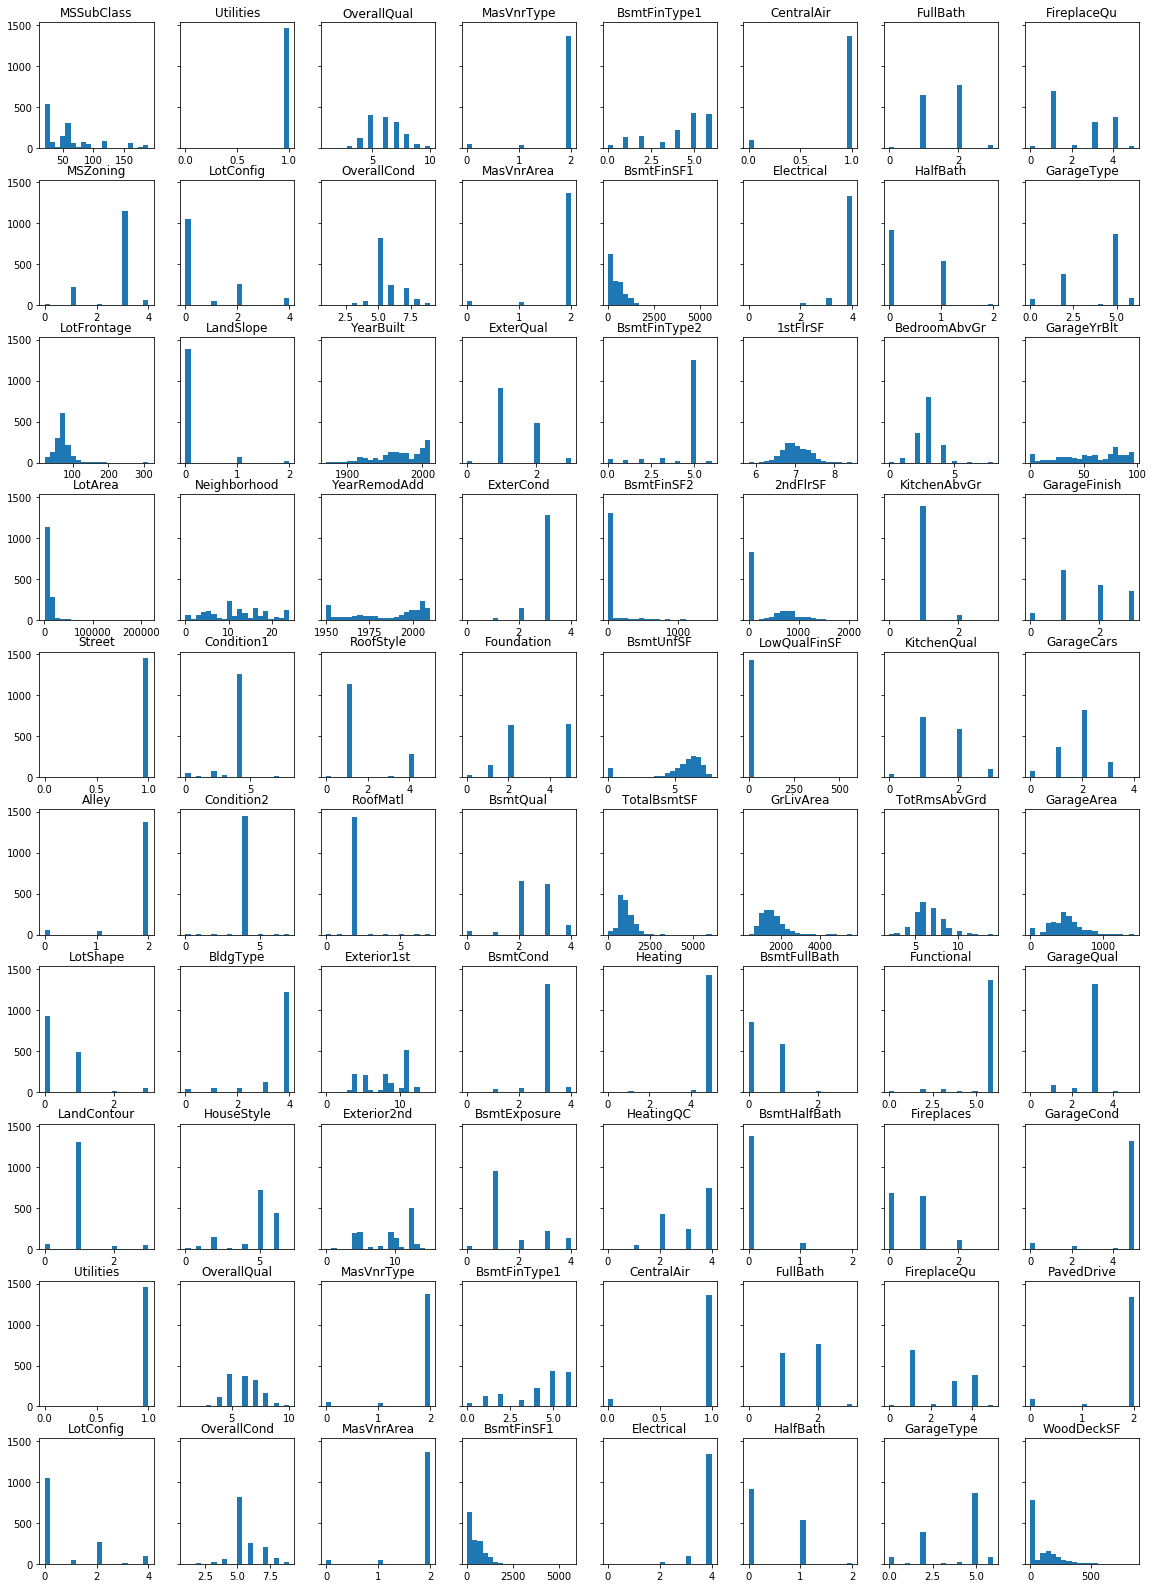

In [162]:
fig, ax = plt.subplots(10, 8, sharey=True,  figsize=(16, 22))
plt.tight_layout()

for y, row in enumerate(ax):
    for x, col in enumerate(row):
    #for column in train.columns:
        column = (train.columns[(train.columns != 'Id') & (train.columns != 'SalePrice')])[x * 8 + y]
        col.hist(train[column], bins = 20)
        col.set_title(column)

In [164]:
X_train =  train.drop(['SalePrice'], axis=1)
y_train = train['SalePrice']

In [165]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#Coefficient:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-1057718.115430057
[-2.38735501e+00 -2.28706522e+02 -1.39677192e+03 -1.26357820e+02
  2.38150574e-01  2.19892438e+04  1.15906170e+03 -2.03134196e+02
  4.35149477e+03  6.17002643e+04  1.21869793e+03 -4.00327291e+03
  2.02179772e+03  2.19607999e+03 -9.27754694e+03 -5.76088264e+03
 -7.51300780e+02  9.48754485e+03  4.98093489e+03  4.87367898e+01
 -1.10936362e+02  2.52162125e+03  8.83116269e+03  2.74720988e+02
  3.71507919e+01  1.15906170e+03  1.15906170e+03  1.04107810e+04
 -1.77940387e+02  2.49530072e+02  6.54173494e+03 -4.85819314e+03
  5.48757797e+03 -4.14200451e+02  1.18763967e+01  3.75468352e+02
  6.85341208e-02 -7.32271392e+02  2.48779672e+00  7.37304172e+01
  1.29434811e+03  3.01571764e+02 -4.18833570e+03  3.40219735e+04
  2.54689387e+01 -2.28725873e+01  2.25951622e+01  3.60133730e+03
 -1.15302455e+03  2.72895269e+03  2.77829750e+03 -4.52522979e+03
 -2.50459006e+04  9.26422398e+03  3.97040144e+03  3.94679403e+03
  3.02640067e+03  7.69875520e+02 -1.42158104e+03 -3.94539802e+01
  4.72

In [166]:
# with statsmodels
X = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 
 
model.summary()

C:\Users\mkive\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              748.6
Date:                Thu, 12 Dec 2019   Prob (F-statistic):                        0.00
Time:                        23:34:51   Log-Likelihood:                         -17125.
No. Observations:                1460   AIC:                                  3.441e+04
Df Residuals:                    1382   BIC:                                  3.482e+04
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id               -2.3800      1.975     -1.205      0.228      -6.254       1.494
MSSubClass     -229.2437     40.975     -5.595      0.000    -309.623    -148.864
MSZoning      -1341.3540   1414.712     -0.948      0.343   -4116.569    1433.861
LotFrontage    -125.3896     47.876     -2.619      0.009    -219.306     -31.473
LotArea           0.2350      0.107      2.195      0.028       0.025       0.445
Street         2.146e+04   1.38e+04      1.553      0.121   -5650.203    4.86e+04
Alley          1166.5484    770.920      1.513      0.130    -345.751    2678.848
LotShape       -223.1822   1461.726     -0.153      0.879   -3090.624    2644.260
LandContour    4345.4893   2000.115      2.173      0.030     421.899    8269.079
Utilities      6.052e+04    3.2e+04      1.889      0.059   -2338.672    1.23e+05
LotConfig      1227.7033    756.381      1.623      0.105    -256.077    2711.483
LandSlope     -3936.3289   3668.247     -1.073      0.283   -1.11e+04    3259.606
Neighborhood   2020.7898    235.935      8.565      0.000    1557.960    2483.619
Condition1     2201.9970    873.262      2.522      0.012     488.935    3915.059
Condition2    -9322.0417   3371.914     -2.765      0.006   -1.59e+04   -2707.419
BldgType      -5744.4999   2195.119     -2.617      0.009   -1.01e+04   -1438.375
HouseStyle     -748.2773    714.232     -1.048      0.295   -2149.374     652.819
OverallQual    9519.7700   1200.831      7.928      0.000    7164.121    1.19e+04
OverallCond    4996.4734   1023.991      4.879      0.000    2987.728    7005.218
YearBuilt        41.9169     73.599      0.570      0.569    -102.460     186.294
YearRemodAdd   -112.9297     68.454     -1.650      0.099    -247.215      21.355
RoofStyle      2528.5376    749.067      3.376      0.001    1059.107    3997.968
RoofMatl       8769.5433   2096.067      4.184      0.000    4657.726    1.29e+04
Exterior1st     295.0445    646.464      0.456      0.648    -973.113    1563.201
Exterior2nd      39.8993    570.980      0.070      0.944   -1080.183    1159.981
MasVnrType     1166.5484    770.920      1.513      0.130    -345.751    2678.848
MasVnrArea     1166.5484    770.920      1.513      0.130    -345.751    2678.848
ExterQual      1.047e+04   2556.598      4.096      0.000    5456.682    1.55e+04
ExterCond      -215.5160   2122.473     -0.102      0.919   -4379.133    3948.101
Foundation      261.9240    841.323      0.311      0.756   -1388.484    1912.332
BsmtQual       6662.3205   2104.532      3.166      0.002    2533.899    1.08e+04
BsmtCond      -5083.0722   2716.781     -1.871      0.062   -1.04e+04     246.389
BsmtExposure   5434.1709   1008.039      5.391      0.000    3456.718    7411.624
BsmtFinType1   -383.5072    663.

In [167]:
## Removing Variables wit

In [168]:
test = removena(test)
test = encode_test()
for nacolumn in test.loc[:, test.isna().any()].columns:
    test[nacolumn].fillna(test[nacolumn].mode()[0], inplace=True)
test['1stFlrSF'] = test['1stFlrSF'].apply(lambda x: np.log(x+1))
test.BsmtUnfSF = test.BsmtUnfSF.apply(lambda x: np.log(x+1))
y_pred = regressor.predict(test)

In [169]:
submission = pd.concat([pd.Series(test.Id), pd.Series(y_pred)], axis=1)
submission.columns = ['Id', 'SalePrice']
submission.head()

,Id,SalePrice
0,1461,115815.044322
1,1462,169823.336673
2,1463,171018.725234
3,1464,189151.632569
4,1465,213463.406877


In [170]:
pd.DataFrame(submission).to_csv("submission.csv", index=False)